In [ ]:
import gym_unbalanced_disk
import gymnasium
import numpy as np
from matplotlib import pyplot as plt

#create inputs
umax = 3.0 
np.random.seed(46)
ulist = np.random.uniform(-1,1,size=1000)
from scipy import signal
f0 = 0.8
ulist = signal.lfilter(*signal.butter(6,f0),ulist)
ulist /= max(np.max(ulist),-np.min(ulist))
ulist = umax*abs(ulist)**(1/4)*np.sign(ulist) #push to limits

plt.plot(ulist[:100])
plt.show()

env = gym_unbalanced_disk.UnbalancedDisk_exp(umax = umax,dt = 0.025)
obs, info = env.reset()
ylist = []
for u in ulist:
    ylist.append(obs)
    obs, reward, terminal, truncated, info = env.step(u)
env.reset()


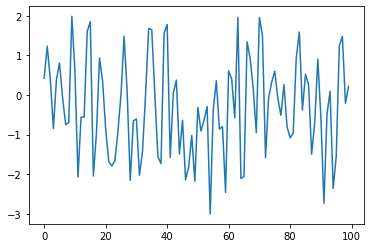

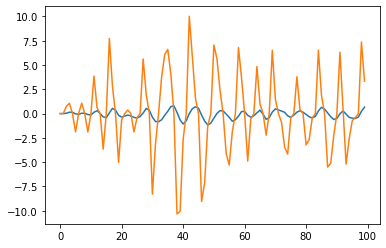

In [8]:
plt.plot(ulist) 
plt.show()
plt.plot(ylist)
plt.show()

In [9]:
env.close()